# 🧠 Emotion Classification with Hugging Face

In [4]:
import sys
# class to clean the text
sys.path.append('../src')

from sentiment_model import EmotionAnalyzer
import pandas as pd

# Cargar dataset limpio
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,comment_id,clean_text,created_time,subreddit,score,post_title
0,k9sxj6h,the west will forget about it just like they f...,2023-11-18 20:10:43,CombatFootage,4,"Israeli Air Force Bombing Missions, Gaza."
1,k9yws3o,i'm going to george costanza it and be first,2023-11-20 02:31:46,CrazyFuckingVideos,30,Boat Sinks In The Bahamas. (Inside &amp; Outsi...
2,k8vimgl,this is advanced warfare memefare,2023-11-12 02:08:24,CombatFootage,30,Israel released this mock video in Hamas style...
3,m2t6ygi,where is turkey,2024-12-19 12:00:02,AskMiddleEast,-1,I'm Rate every arabic flag from 10 ( Explained )
4,kis7d8z,exactly this they are trying to disrupt wester...,2024-01-20 19:54:04,worldnews,85,Houthis claim they don’t seek to attack ships ...


In [5]:
# Inicializar clasificador
analyzer = EmotionAnalyzer()

C:\Users\wwwde\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wwwde\.cache\huggingface\hub\models--bhadresh-savani--distilbert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
C:\Users\wwwde\AppData\Roaming\Python\Python312\site-pa

In [6]:
# Aplicar modelo al DataFrame (puedes limitar a 500 para pruebas)
df_subset = df.head(500).copy()
df_result = analyzer.apply_to_dataframe(df_subset, text_column="clean_text")

# Mostrar algunos resultados
df_result[["clean_text", "predicted_emotion"]].head(10)

,clean_text,predicted_emotion
0,the west will forget about it just like they f...,sadness
1,i'm going to george costanza it and be first,joy
2,this is advanced warfare memefare,joy
3,where is turkey,anger
4,exactly this they are trying to disrupt wester...,anger
5,we did it lefties we save gaza,joy
6,they don’t hate them but of course they view t...,joy
7,love this it’s a shame we have rutte in charge...,anger
8,russia managed to sway just enough americans t...,joy
9,gtthere’s lots of video of hamas in civilian a...,anger


In [7]:
# Disable the display of the maximum number of characters in a column
pd.set_option('display.max_colwidth', None)
df_result[["clean_text", "predicted_emotion"]].head(50)

,clean_text,predicted_emotion
0,the west will forget about it just like they forgot about ukraine we don't have long attention spans,sadness
1,i'm going to george costanza it and be first,joy
2,this is advanced warfare memefare,joy
3,where is turkey,anger
4,exactly this they are trying to disrupt western shipping and economies,anger
5,we did it lefties we save gaza,joy
6,they don’t hate them but of course they view them as a thorn which keeps destabilizing the region but domestically the saudi regime can’t normalize without assurances for the palestinians its people will not allow it it’s real politic nothing else to be done,joy
7,love this it’s a shame we have rutte in charge though,anger
8,russia managed to sway just enough americans to put their puppet back on the throne,joy
9,gtthere’s lots of video of hamas in civilian areas lol! all of gaza is a civilian area! do you have any videos of hamas standing behind old ladies or children as they fire their guns or threaten israelis? anything comparable to the video evidence of the idf literally using palestinians as human shields in such a way? i didn't think so! gtgazans aren’t being killed indiscriminately this is such a preposterous story that it amazes me people are duped into believing it you're right it's not indiscriminate they are being targeted and killed by israel on purpose the daily sniper bullets to palestinian children's heads and hearts make it obvious,anger


<Axes: title={'center': 'Distribución de emociones'}, xlabel='predicted_emotion'>

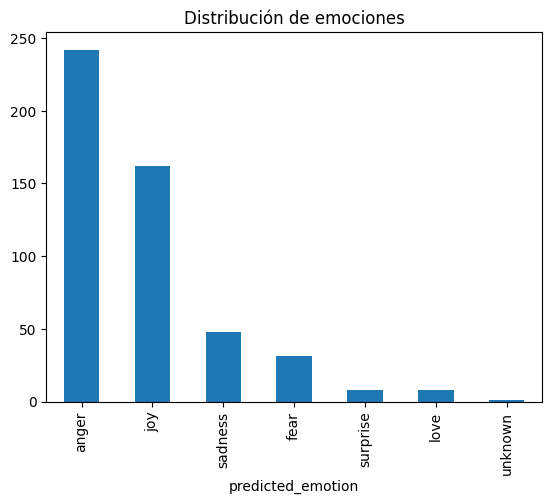

In [8]:
# Opcional: ver distribución de emociones
df_result["predicted_emotion"].value_counts().plot(kind="bar", title="Distribución de emociones")